In [3]:
import sklearn # Scikit-learn est une bibliothèque libre Python destinée à l'apprentissage automatique.
import sklearn.datasets # sklearn.datasets contient plusieurs datasets pour deep learning
import numpy as np

from skimage.io import imread # pour ouvrir les images et les stocker dans des variables
from skimage.transform import resize # pour changer les dimensions d'une photo

import pandas as pd # pour la visualisation des données, des tableaux

from matplotlib import pyplot # pour l'affichage des photos dans des figures
from os import listdir # il permet  de gérer l’arborescence des fichiers (boucler sur le fichie)

In [4]:
"""============================================
    Chargement de la base de données "iris"
============================================"""
X = []
Y = []

i = 0

for k in range(1, 47):
    folder_left = "C:/Users/abdou/Desktop/New folder/MMU/" + str(k) + "/left"
    folder_right = "C:/Users/abdou/Desktop/New folder/MMU/" + str(k) + "/right"

    for j in os.listdir(folder_left):
        if j.endswith('.bmp'):
            img_resized = resize(imread(folder_left + '/' + j), (120, 160, 3))
            img_array = img_resized.flatten()
            X.append(img_array)
            Y.append(k - 1)


    for j in os.listdir(folder_right):
        if j.endswith('.bmp'):
            img_resized = resize(imread(folder_right + '/' + j), (120, 160, 3))
            img_array = img_resized.flatten()
            X.append(img_array)
            Y.append(k - 1)


X = np.array(X)
Y = np.array(Y)

Photo 0 dans X:


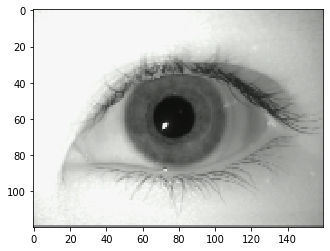

In [5]:
print("Photo 0 dans X:")
pyplot.imshow(X[0].reshape(120, 160, 3), interpolation="nearest")
pyplot.show()

In [6]:
# visualisation des données en utilisant pandas
dataFrame = pd.DataFrame(X)
# Creation du colonne pour les resultats attendus
dataFrame['Resultat'] = Y

dataFrame

,0,1,2,3,4,5,6,7,8,9,...,57591,57592,57593,57594,57595,57596,57597,57598,57599,Resultat
0,0.960679,0.969780,0.952089,0.941925,0.957523,0.935402,0.934740,0.948979,0.932675,0.925491,...,0.424197,0.429198,0.416266,0.423002,0.430275,0.415425,0.414501,0.424018,0.423087,0
1,0.813742,0.831848,0.813082,0.954783,0.956793,0.954603,0.923067,0.925075,0.909061,0.871459,...,0.421768,0.429897,0.420928,0.415067,0.419211,0.406658,0.406658,0.410999,0.405819,0
2,0.972549,0.972549,0.972549,0.972549,0.972549,0.972549,0.972549,0.972549,0.972549,0.972549,...,0.417013,0.424770,0.422341,0.415248,0.422849,0.407586,0.412165,0.411090,0.405819,0
3,0.972549,0.972549,0.972547,0.970124,0.971712,0.963122,0.946033,0.965547,0.945194,0.963955,...,0.424582,0.430979,0.415250,0.409083,0.423225,0.408334,0.426915,0.425840,0.427752,0
4,0.921647,0.937241,0.921641,0.845331,0.851633,0.832819,0.775158,0.792710,0.768061,0.939589,...,0.396388,0.404650,0.390130,0.396297,0.401473,0.396204,0.390128,0.397177,0.388452,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,0.668357,0.683953,0.668354,0.693010,0.703611,0.684602,0.652575,0.663171,0.650897,0.726388,...,0.532683,0.533524,0.531184,0.533345,0.536608,0.525593,0.532687,0.533900,0.533342,45
456,0.727729,0.740661,0.722220,0.718307,0.730398,0.711959,0.708218,0.715734,0.705884,0.724075,...,0.538479,0.541699,0.536984,0.532312,0.538947,0.536986,0.538569,0.538616,0.538479,45
457,0.894025,0.912838,0.887023,0.774885,0.785989,0.773386,0.658844,0.665012,0.652496,0.692788,...,0.532222,0.537777,0.536234,0.537066,0.538149,0.536143,0.538479,0.538195,0.537640,45
458,0.784866,0.802510,0.784113,0.624881,0.630062,0.612371,0.623338,0.634922,0.627169,0.676737,...,0.536137,0.540059,0.535387,0.536976,0.538055,0.536051,0.536978,0.537023,0.536137,45


In [18]:
# Diviser les données : des données pour l'entrainement et autres pour l'evaluation
from sklearn.model_selection import train_test_split
# X : Les données d'entrée
# Y : Les données de sortie (les resultats attendus)
print("Les dimensions des données d'entrée:",X.shape)
print("Les dimensions des données de sortie:",Y.shape)
x_train,x_test,y_train,y_test = train_test_split(X,Y,shuffle=True,test_size = 0.2,random_state=109,stratify=Y)
print("Les dimensions des données d'entrainement d'entrée:",x_train.shape)
print("Les dimensions des données d'evaluation d'entrée:",x_test.shape)
print("Les dimensions des données d'entrainement de sortie:",y_train.shape)
print("Les dimensions des données d'evaluation d'entrée:",y_test.shape)

Les dimensions des données d'entrée: (460, 57600)
Les dimensions des données de sortie: (460,)
Les dimensions des données d'entrainement d'entrée: (368, 57600)
Les dimensions des données d'evaluation d'entrée: (92, 57600)
Les dimensions des données d'entrainement de sortie: (368,)
Les dimensions des données d'evaluation d'entrée: (92,)


In [20]:
# SVM
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold , KFold

# Des parametres pour le reseau de neurones
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]
inner_cv = KFold(n_splits=15, shuffle=False)

# GridSearchCV pour trouver les meilleurs parameteres
# verbose : les pas pour trouver ces parameters
cv = GridSearchCV(SVC(), tuned_parameters, refit = True,verbose= 3,cv=inner_cv) 
cv.fit(x_train,y_train)

Fitting 15 folds for each of 8 candidates, totalling 120 fits
[CV 1/15] END .....C=1, gamma=0.001, kernel=rbf;, score=0.320 total time=  26.5s
[CV 2/15] END .....C=1, gamma=0.001, kernel=rbf;, score=0.520 total time=  27.5s
[CV 3/15] END .....C=1, gamma=0.001, kernel=rbf;, score=0.400 total time=  28.8s
[CV 4/15] END .....C=1, gamma=0.001, kernel=rbf;, score=0.400 total time=  26.4s
[CV 5/15] END .....C=1, gamma=0.001, kernel=rbf;, score=0.480 total time=  26.9s
[CV 6/15] END .....C=1, gamma=0.001, kernel=rbf;, score=0.520 total time=  26.1s
[CV 7/15] END .....C=1, gamma=0.001, kernel=rbf;, score=0.480 total time=  26.0s
[CV 8/15] END .....C=1, gamma=0.001, kernel=rbf;, score=0.440 total time=  26.1s
[CV 9/15] END .....C=1, gamma=0.001, kernel=rbf;, score=0.708 total time=  26.1s
[CV 10/15] END ....C=1, gamma=0.001, kernel=rbf;, score=0.542 total time=  26.5s
[CV 11/15] END ....C=1, gamma=0.001, kernel=rbf;, score=0.625 total time=  26.0s
[CV 12/15] END ....C=1, gamma=0.001, kernel=rbf

GridSearchCV(cv=KFold(n_splits=15, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             verbose=3)

In [26]:
# afficher les parametres selectionnées par GridSearchCV
print("Les meilleurs parameters sont:",cv.best_params_)
# Creation du model avec les meilleurs parametres trouvées
svm = cv.best_estimator_

Les meilleurs parameters sont: {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}


In [40]:
# La prediction du model apres l'application des meilleurs parametres
y_prediction = svm.predict(x_test)
# afficher les resultats attendus et obtenus
print("Les resultats attendus: ",y_test)
print("Les resultats obtenus:",y_prediction)

Les resultats attendus:  [26 23  5 37 21 20 36 40 41 16 24 27 10 10 38  6  7 40  1 22 45 39  8 35
 19  2 25 34 42 44 31  8 14 41  9  2 12 44 11 39 38 32 23 30 17 45 11 35
 17 13 18 43 26 43 37  9 13  7  0 12 31 15 21  3 33 25  5 30  0 15  4  4
  1 22 19  6 20 29 14  3 18 34 42 32 16 24 28 28 27 33 36 29]
Les resultats obtenus: [19 23  5 37 21 20 36 40 41 16 24 27 10 10 34 21  7 16 29 17 45 39  8 35
 19  3 25 34 42 44 31  8 14 41  9  2 12 44 11 39 38 32 23 30 17 45 11 35
  2 13 18 43 26 43 37 25 13  9 13 12 31 15 21  2 33 25  5 30  1 15  4 36
 31 22 19  6  1 27 14  2 18 34 42 32 16 24  6  7 27  3 36 20]


In [41]:
from sklearn.metrics import accuracy_score

print("Pourcentage de precision de ce model:")
print(accuracy_score(y_test, y_prediction)*100, "%")

# on peut ameliorer cette valeur par l'incrementation du nombre d'iterations (n_splits)

Pourcentage de precision de ce model:
76.08695652173914 %
